### Spam

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\Tamilselvan.E\Downloads\Spam classification\smsspamcollection\SMSSpamCollection',sep='\t',header=None)
df.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.columns=['label','message']

In [4]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.shape

(5572, 2)

In [6]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [7]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [8]:
import nltk
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tamilselvan.E\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
from nltk.corpus import stopwords
stopwords=stopwords.words('english')

### data cleaning

#### Lemmatization

In [10]:
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()

In [11]:
corpus_l=list()
for i in range(len(df)):
    sentence=re.sub('[^a-zA-Z0-9]',' ',df['message'][i])
    words=nltk.word_tokenize(sentence)
    words=[lemmatizer.lemmatize(word) for word in words if word not in stopwords]
    corpus_l.append(' '.join(words))

In [12]:
corpus_l

['Go jurong point crazy Available bugis n great world la e buffet Cine got amore wat',
 'Ok lar Joking wif u oni',
 'Free entry 2 wkly comp win FA Cup final tkts 21st May 2005 Text FA 87121 receive entry question std txt rate T C apply 08452810075over18',
 'U dun say early hor U c already say',
 'Nah I think go usf life around though',
 'FreeMsg Hey darling 3 week word back I like fun still Tb ok XxX std chgs send 1 50 rcv',
 'Even brother like speak They treat like aid patent',
 'As per request Melle Melle Oru Minnaminunginte Nurungu Vettam set callertune Callers Press 9 copy friend Callertune',
 'WINNER As valued network customer selected receivea 900 prize reward To claim call 09061701461 Claim code KL341 Valid 12 hour',
 'Had mobile 11 month U R entitled Update latest colour mobile camera Free Call The Mobile Update Co FREE 08002986030',
 'I gon na home soon want talk stuff anymore tonight k I cried enough today',
 'SIX chance win CASH From 100 20 000 pound txt CSH11 send 87575 Cos

In [13]:
### target
y=pd.get_dummies(df['label'],drop_first=True)

#### Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(corpus_l,y,test_size=0.20,random_state=0)

#### data preprocessing 
- 1. word to vectors(One-Hot Encoding)
- 2. Sentence to vectors(BOW,TF-IDF)

#### BOW

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X_train_arr=cv.fit_transform(X_train).toarray()
X_train_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
X_test_arr=cv.transform(X_test).toarray()
X_test_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### RandomForest

classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       955
           1       1.00      0.88      0.94       160

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy Score:0.98


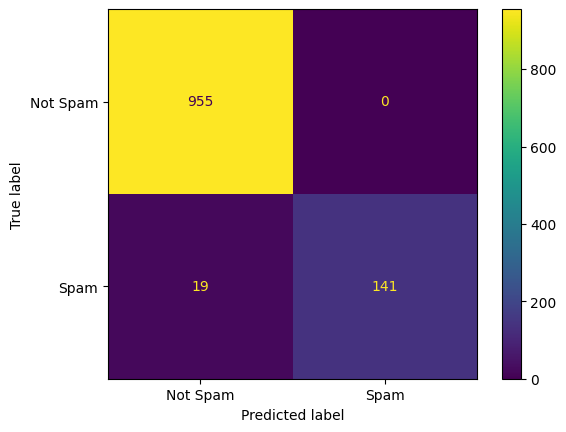

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train_arr,np.ravel(np.array(y_train).reshape(-1,1)))
y_test_pred=rf_clf.predict(X_test_arr)


from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score

print(f'classification report:\n{classification_report(y_test,y_test_pred)}')
print(f'Accuracy Score:{accuracy_score(y_test,y_test_pred):.2f}')
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_test_pred),
                       display_labels=['Not Spam','Spam']).plot()

#### TF-IDF

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer()
X_train_arr=cv.fit_transform(X_train).toarray()
X_train_arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
X_test_arr=cv.transform(X_test).toarray()
X_test_arr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### RandomForest Classifier

classification report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       955
           1       0.99      0.86      0.92       160

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy Score:0.98


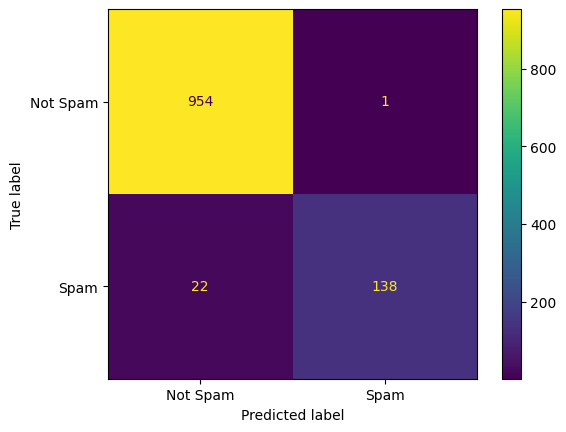

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train_arr,np.ravel(np.array(y_train).reshape(-1,1)))
y_test_pred=rf_clf.predict(X_test_arr)


from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score

print(f'classification report:\n{classification_report(y_test,y_test_pred)}')
print(f'Accuracy Score:{accuracy_score(y_test,y_test_pred):.2f}')
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_test_pred),
                       display_labels=['Not Spam','Spam']).plot()